# This Jupyter notebook contains the instructions for Assessment 2019 for the module Fundamentals of Data Analysis 2019

GMIT H.Dip Data Analytics - Academic Year 2019 - 2020


##### Student: Henk Tjalsma


##### GMIT email address: G00376321@gmit.ie

## Problem statement

> This assessment concerns the well-known tips [6] dataset and the Python [1] packages seaborn [5] and jupyter [4]. The project is broken into three parts, as follows:

Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.
* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. This part is worth 30% of your overall mark.

Regression:

* To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount, and this part is also worth 30%.

Analyse:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

## Tips data set - what does it contain?

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule. [16]

##### Columns:

> total_bill : Total bill (cost of the meal), including tax, in US dollars

> tip : Tip (gratuity) in US dollars

> sex : Sex of person paying for the meal (0=male, 1=female)

> smoker : Smoker in party? (0=No, 1=Yes)

> day : 3=Thur, 4=Fri, 5=Sat, 6=Sun

> time : 0=Day, 1=Night

> size : Size of the party (between 1 and 6)

In [1]:
# Import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Loading a .csv file into a pandas DataFrame
tips = pd.read_csv('tips.csv', delimiter = ',')

## 1. Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.

* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. 

In [3]:
# Describing first 5 columns
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The tips.head command showed us that for this tips data set, the columns sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data. [17]

In [4]:
# Get the shape of the dataset - number of rows and columns
tips.shape

(244, 7)

In [5]:
# Describe the data (numbers) in the dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe command allowed us to retrieve some common information such as min, max, unique and count for given numerical data.

In [6]:
# Checking missing values (isnull method) in the dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

##### Univariate plots

These plots are based on a single variable and show the frequency of unique values of a given variable. In below example, there is just the tip amount.

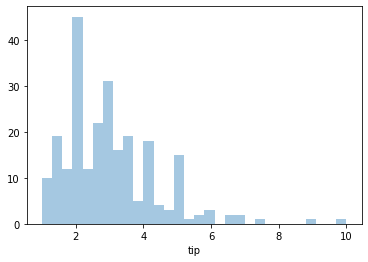

In [7]:
sns.distplot(tips['tip'], kde=False, bins=30);

If you increase the number of bins, the more accurate the result will be.

We can see that the count of the different tip values present in the dataset implies that most of the tips are between 2 and 3.

##### Kerner Density Estimate (KDE)

KDE is a way to estimate the probability density function of a continuous random variable. It is used when you need to know the distribution of the variable.

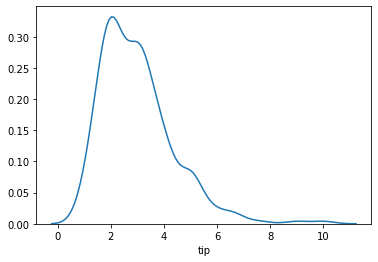

In [8]:
sns.distplot(tips['tip'],hist=False, bins=10);

## 2. Regression:

* To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

##### Bivariate Plots

This type of plots is used when you need to find a relation between two variables and how the value of one variable changes the value of another variable. Different types of plots are used based on the data type of the variable.

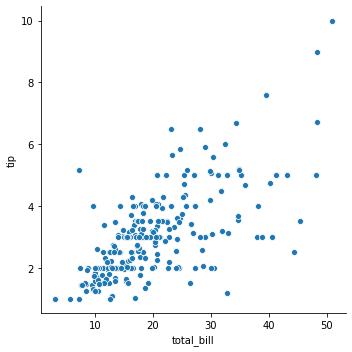

In [9]:
sns.relplot(x="total_bill", y="tip", data=tips);

The default plot type of relplot is scatterplot. It shows the relationship between two variables. So, if you need to find the correlation between two variables scatterplot can be used.

In the given example above, we can see that if total_bill is between 10–20 than the tip will be mostly above 2.

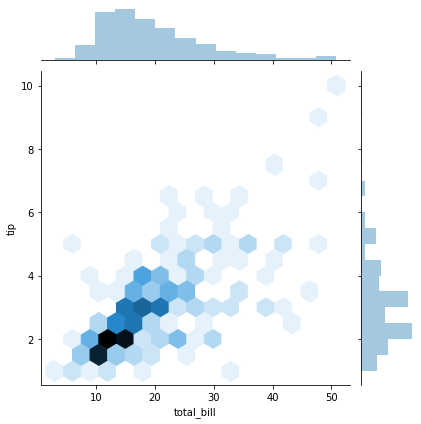

In [10]:
# In below the very dark region is the highest concentration
sns.jointplot(x = 'total_bill', y = 'tip', data = tips ,kind = 'hex')

We can add a third variable also in scatterplot using different colors or shape of dots.

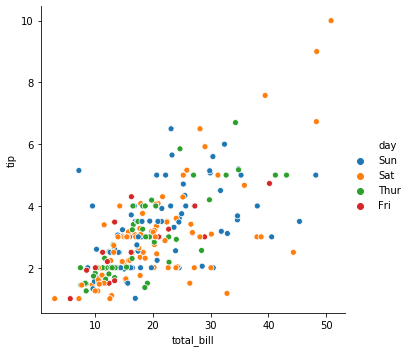

In [11]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

## 3. Analysis:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

##### Categorical data types - Scatterplot

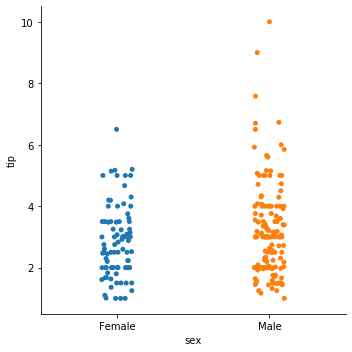

In [12]:
sns.catplot(x="sex", y="tip", data=tips);

In above, we can see that most of the tips are concentrated between 2 and 4 irrespective of the gender.

Different types of scatterplots can be made using attribute kind in seaborn.

The third variable can be used using attribute hue in seaborn.

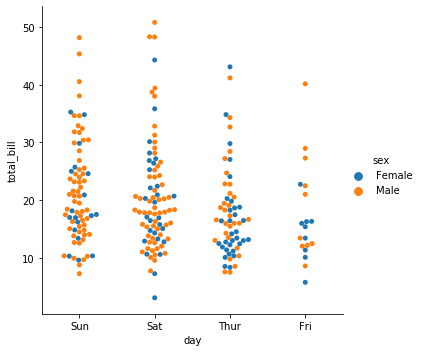

In [13]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

The categories to be represented on the x-axis are sorted as per the pandas categories. If you want to change the order of it you can use order attribute in seaborn.

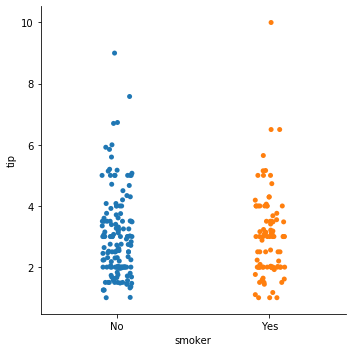

In [14]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

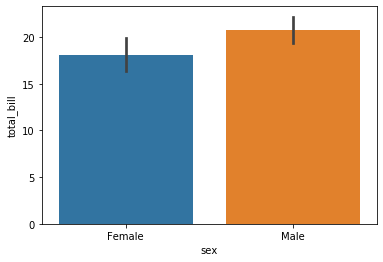

In [15]:
# Below plot shows most bills are paid by the male compared to the female
sns.barplot(x = 'sex', y ='total_bill', data = tips)

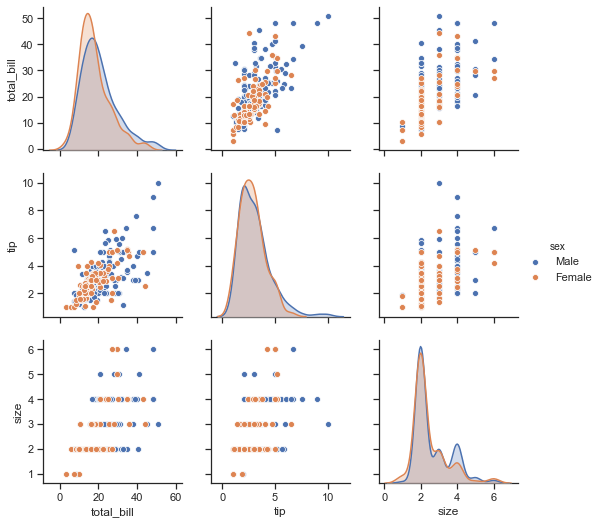

In [16]:
sns.set(style="ticks")

df = sns.load_dataset("tips")
sns.pairplot(df, hue="sex")

## References

[1] Python Software Foundation. Welcome to python.org.
https://www.python.org/.

[2] GMIT. Quality assurance framework.
https://www.gmit.ie/general/quality-assurance-framework.

[3] GitHub Guides. Mastering markdown.
https://guides.github.com/features/mastering-markdown/.

[4] Project Jupyter. Project jupyter.
https://jupyter.org/.

[5] Michael Waskom. seaborn.
https://seaborn.pydata.org/.

[6] Michael Waskom. Tips data set.
https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.

[7] Seaborn

https://anaconda.org/anaconda/seaborn

[8] Anaconda

https://docs.anaconda.com/anaconda/

[9] Python

https://www.python.org/downloads/

[10] Cmder software

https://cmder.net/

[11] https://stackoverflow.com/questions/30336324/seaborn-load-dataset

[12] https://stackoverflow.com/questions/43422692/loading-web-data-file-to-pandas-dataframe

[13] https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

[14] https://www.kaggle.com/ssouhassou/data-viz-a-modest-essay-on-the-dataset-tips

[15] https://www.kaggle.com/ranjeetjain3/different-types-of-charts

[16] https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

[17] https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e